(5, 64, 64, 1) (5, 64, 64, 1)


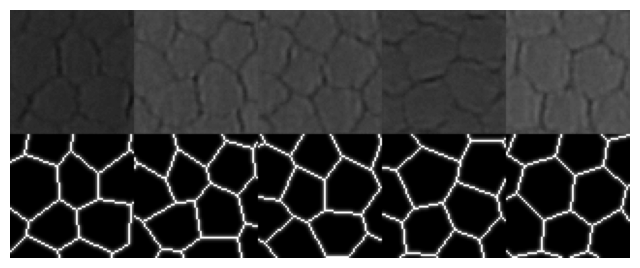

In [1]:
"""
Dataset Generator with GAN Generator model
@author: Adrian Kucharski
"""

import json
from skimage import io, exposure
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from dataset import crop_patch, generate_dataset_from_generators, images_preprocessing

config = {
    "generator_path": "generator\\models\\20220405-2359\\model_144.h5",
    "path_to_save": "generated_patches/",
}
preprocesing = {
    "gamma_range": None,
    "log_range": [0.2, 0.8],
    "rotate90": True,
    "noise_range": [-0.01, 0.01],
    "gaussian_sigma": 1.0,
    "corruption_range": None,
    "standardization": False
}
hexagon_generator_params = {
    "num_of_data": 5,
    "hexagon_height": [21, 27],
    "batch_size": 100,
    "neatness_range": [0.6, 0.8],
    "remove_edges_ratio": 0.05,
    "rotation_range": [-60, 60],
    "sap_ratio": [0.0, 0.1],
    "sap_value_range": [0.2, 0.8],
    "keep_edges": 0.8,
    "inv_values": True
  }

synthetic_masks, synthetic_images = generate_dataset_from_generators(
    [config["generator_path"]], hexagon_generator_params
)
if True:
    synthetic_images, synthetic_masks = images_preprocessing(
        synthetic_images,
        synthetic_masks,
        gamma_range=preprocesing["gamma_range"],
        noise_range=preprocesing["noise_range"],
        rotate90=preprocesing["rotate90"],
        gaussian_sigma=preprocesing["gaussian_sigma"],
        corruption_range=preprocesing["corruption_range"],
        log_range=preprocesing["log_range"],
        standardization=preprocesing["standardization"],
    )

print(synthetic_images.shape, synthetic_masks.shape)
data = np.vstack([np.hstack(synthetic_images), np.hstack(synthetic_masks)])
plt.figure(figsize=(8,8*4))
plt.axis('off')
plt.imshow(data, "gray")
plt.show()